In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [315]:
df=pd.read_csv("quikr_car.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


# DISCOVERING THE DATSET AND ITS PROPERTIES

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# note-1
HERE YEAR,PRICE, KMS_DRIVEN SHOULD BE OF TYPE INT BUT THEY ARE IN OBJECT TYPE

In [317]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [318]:
df.shape

(892, 6)

# Data Preprocessing

In [319]:
#here name column contains some extra characters added to it like "XO eRLX Euro III	". we will remove them.
df['name']=df['name'].str.split()

In [320]:
df['name']=df['name'].str[:3].str.join(' ')

In [321]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel


In [322]:
df.company.value_counts()

Maruti        235
Hyundai       145
Mahindra      100
Tata           74
Honda          61
Toyota         39
Chevrolet      35
Renault        34
Ford           31
Volkswagen     20
Skoda          13
Audi           11
Datsun          8
Mini            8
BMW             8
Nissan          6
Commercial      6
Mercedes        6
Mitsubishi      6
Force           4
Fiat            4
tata            3
Hindustan       3
I               3
MARUTI          2
urgent          2
Used            2
Jaguar          2
Sale            2
Well            1
Any             1
TATA            1
sell            1
scratch         1
9               1
7               1
all             1
Land            1
2012            1
i               1
Volvo           1
very            1
Jeep            1
Swift           1
URJENT          1
selling         1
Yamaha          1
Tara            1
Name: company, dtype: int64

In [323]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [324]:
#here in company values, there are some junk classes such as Any,Tara,i,7,9,2012,Used,etc...we get insight of them and remove them
c=['I','Commercial','selling','URJENT','Used',"Sale",'very','i']
for i in c:
    z=df[df['company']==i]['year']
    print(z)
    print("\n")

69     2017
85     2017
723    o...
Name: year, dtype: object


185     ...
286     ...
593    o...
599    Zest
802    k...
808     ...
Name: year, dtype: object


360    Zest
Name: year, dtype: object


401    SELL
Name: year, dtype: object


441    arry
614    Zest
Name: year, dtype: object


616    ture
645     no.
Name: year, dtype: object


643    able
Name: year, dtype: object


725    d...
Name: year, dtype: object




In [325]:
for i in c:
    y=df[df['company']==i]['Price']
    print(y)
    print("\n")

69     Ask For Price
85     Ask For Price
723         4,75,000
Name: Price, dtype: object


185    Ask For Price
286    Ask For Price
593         2,25,000
599         3,71,500
802         1,80,000
808    Ask For Price
Name: Price, dtype: object


360    Ask For Price
Name: Price, dtype: object


401    1,80,000
Name: Price, dtype: object


441    1,50,000
614    2,55,000
Name: Price, dtype: object


616         1,00,000
645    Ask For Price
Name: Price, dtype: object


643    2,00,000
Name: Price, dtype: object


725    3,20,000
Name: Price, dtype: object




from above insights those junk values have their respective price and year columns as words type not int. so we just need to remove those columns while cleaning year and price columns

In [326]:
df=df[df['year'].str.isnumeric()]

In [327]:
df['year']=df['year'].astype(int)

In [328]:
df = df[df['Price'].str.replace(',', '', regex=True).str.isnumeric()]

# Convert the 'price' column to integers
df['Price'] = df['Price'].str.replace(',', '', regex=True).astype(int)

<ipython-input-328-b6ff61f4714c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].str.replace(',', '', regex=True).astype(int)


In [329]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel


NOW AS NAME, YEAR AND PRICE COLUMNS HAS BEEN CLEANED LETS LOOK INTO COMPANY COLUMN

In [330]:
df['company'].unique()
#we can see all the junk classes of company column has been dropped from modifying of price and year column

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [331]:
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [332]:
df=df[df['kms_driven'].str.isnumeric()]
df['kms_driven']=df['kms_driven'].astype(int)

<ipython-input-332-237bee39b536>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kms_driven']=df['kms_driven'].astype(int)


In [333]:
df.fuel_type.value_counts()

Petrol    428
Diesel    386
LPG         2
Name: fuel_type, dtype: int64

# DATA VISUALIZING

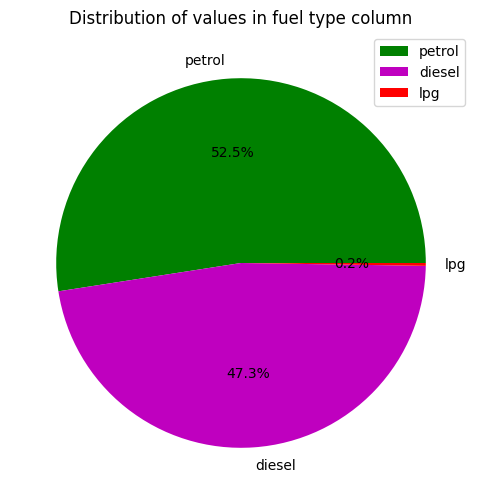

In [334]:
plt.figure(figsize=(10,6))
a=['petrol','diesel','lpg']
colors=['g','m','r','k']
plt.pie(df['fuel_type'].value_counts(),labels=a,colors=colors,autopct = "%1.1f%%")
plt.title("Distribution of values in fuel type column")
plt.legend()
plt.show()

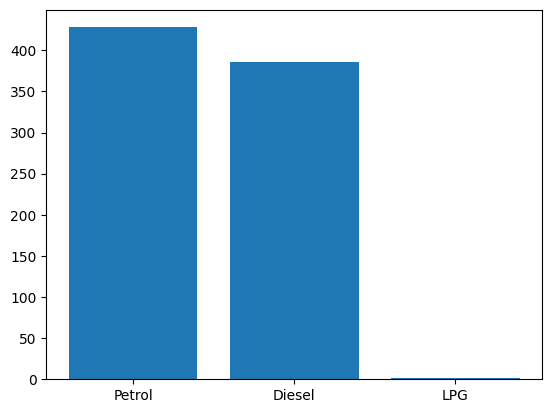

In [335]:
a=df['fuel_type'].value_counts().index
plt.bar(a,df['fuel_type'].value_counts())
plt.show()

In [336]:
b=['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo']

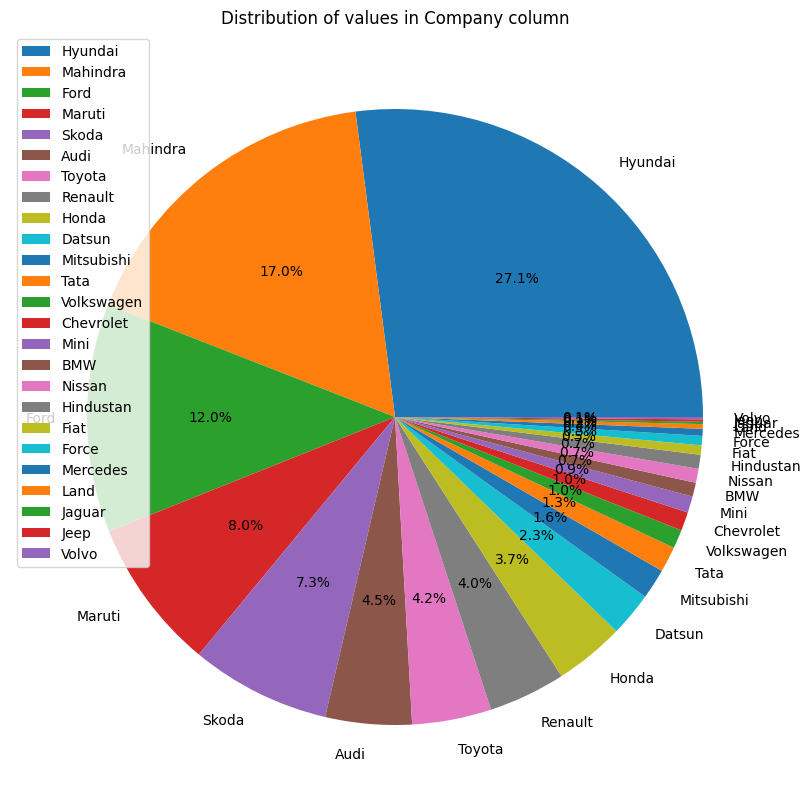

In [337]:
plt.figure(figsize=(20,10))
plt.pie(df['company'].value_counts(),labels=b,autopct = "%1.1f%%")
plt.title("Distribution of values in Company column")
plt.legend()
plt.show()

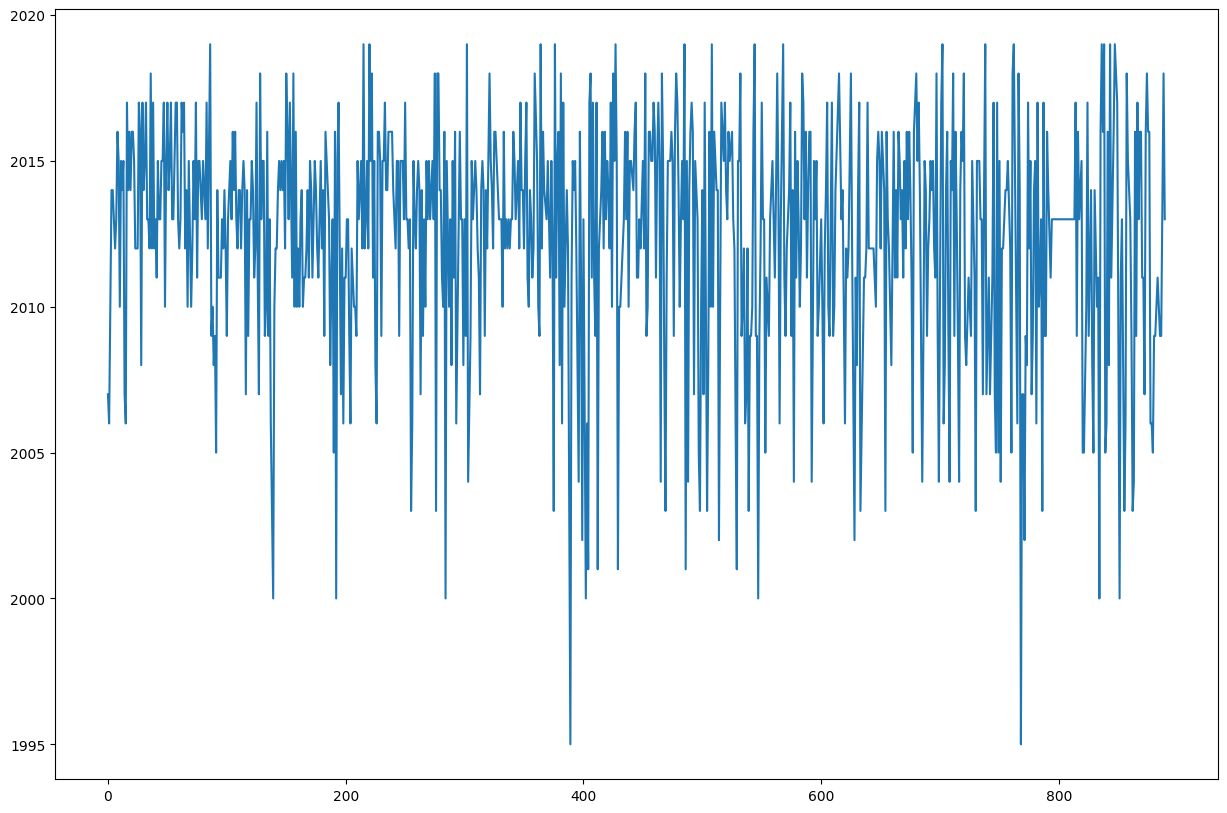

In [338]:
plt.figure(figsize=(15,10))
plt.plot(df['year'])

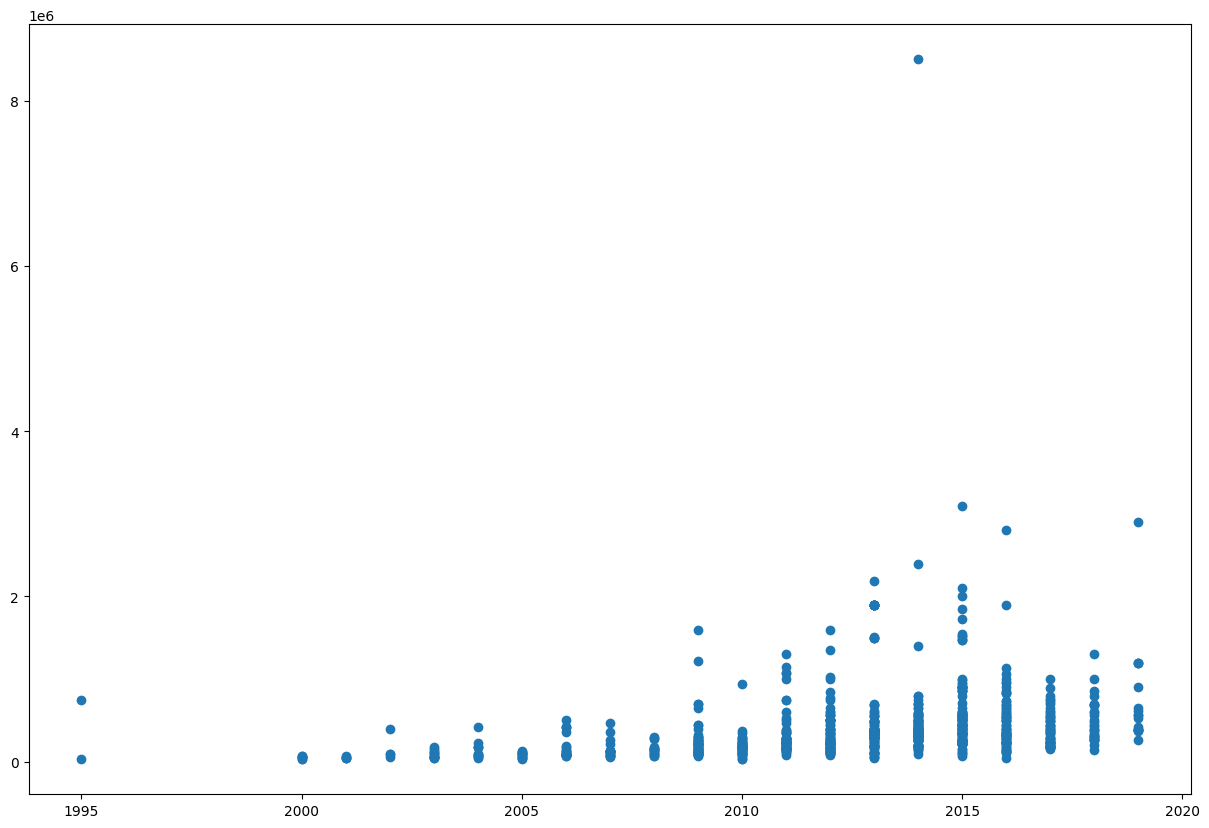

In [339]:
plt.figure(figsize=(15,10))
plt.scatter(df['year'],df['Price'])

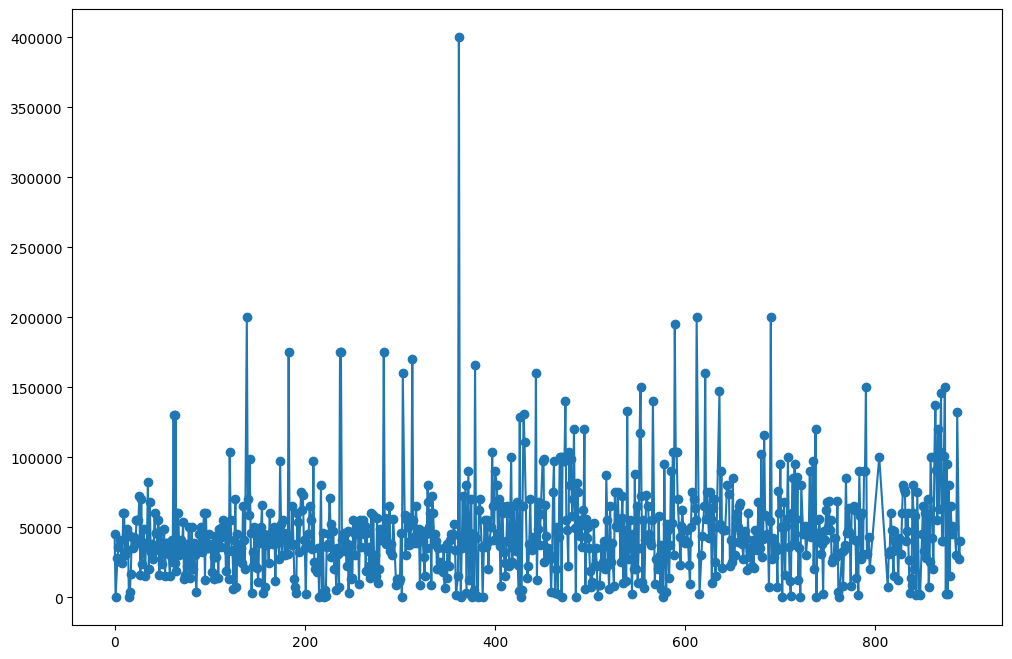

In [340]:
plt.figure(figsize=(12,8))
plt.plot(df['kms_driven'],'o-')

In [342]:
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

In [343]:
df['fuel_type']=df['fuel_type'].fillna(df['fuel_type'].mode()[0], inplace=True)

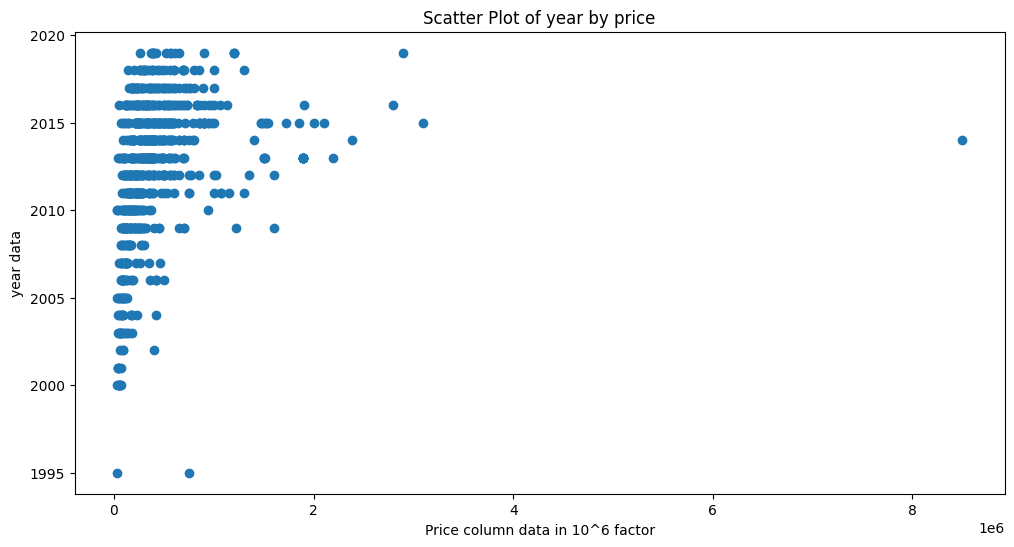

In [344]:
plt.figure(figsize=(12,6))
plt.scatter(df['Price'], df['year'])
plt.xlabel('Price column data in 10^6 factor')
plt.ylabel('year data')
plt.title('Scatter Plot of year by price')
plt.show()

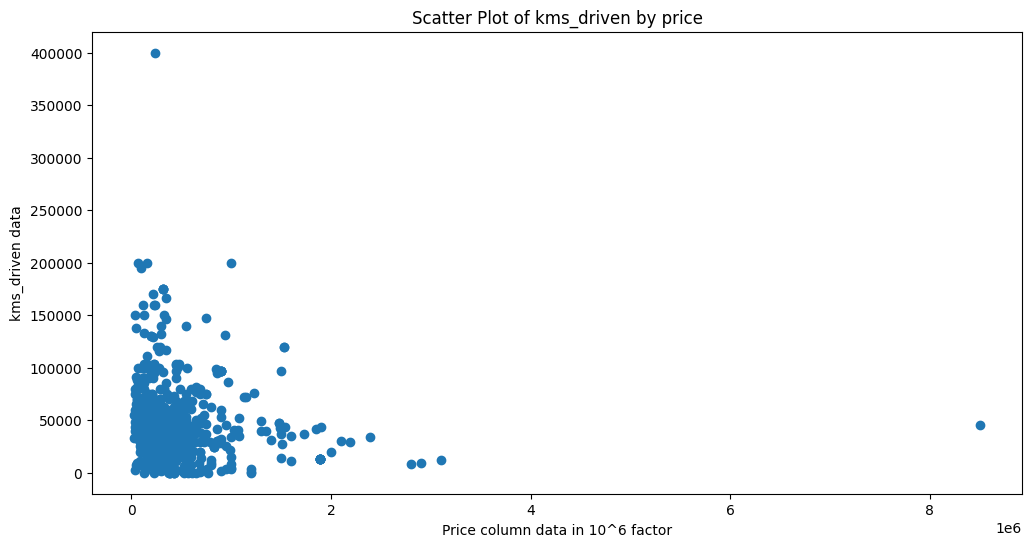

In [345]:
plt.figure(figsize=(12,6))
plt.scatter(df['Price'], df['kms_driven'])
plt.xlabel('Price column data in 10^6 factor')
plt.ylabel('kms_driven data')
plt.title('Scatter Plot of kms_driven by price')
plt.show()

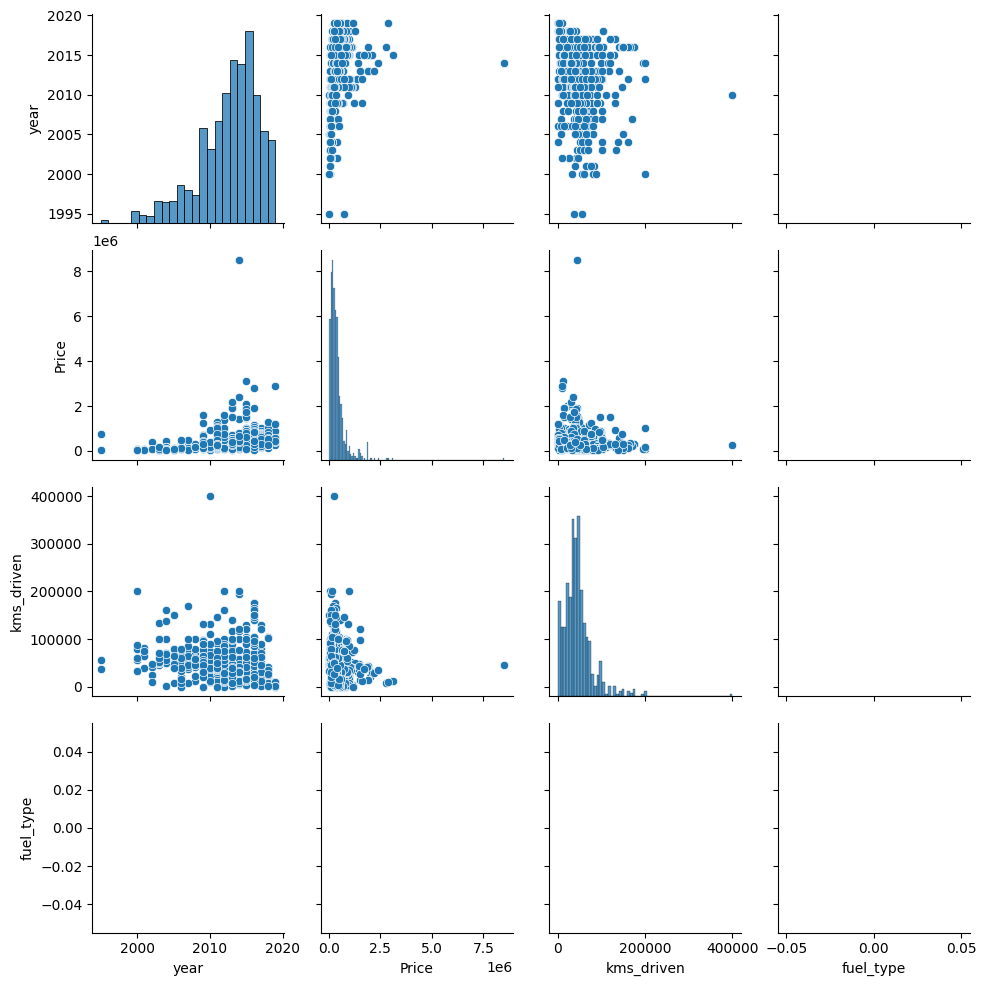

In [346]:
sns.pairplot(df)

In [347]:
df.corr()

<ipython-input-347-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,Price,kms_driven
year,1.000000,0.287351,-0.232916
Price,0.287351,1.000000,-0.120614
kms_driven,-0.232916,-0.120614,1.000000


<ipython-input-348-ad986bb76f0a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn', center=0.117)


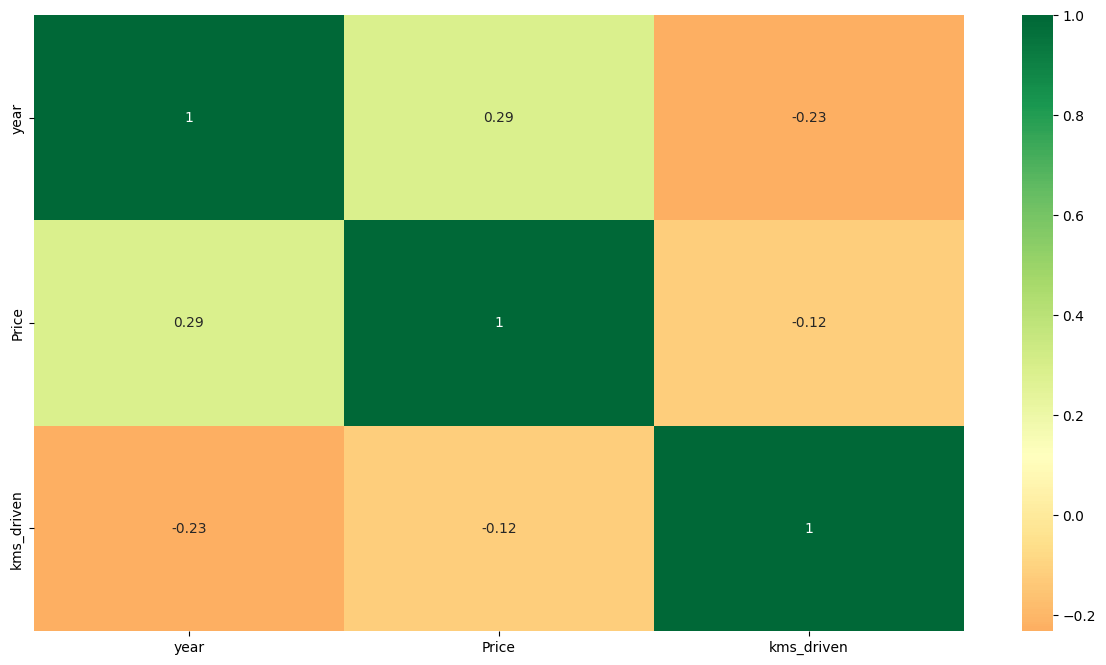

In [348]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap = 'RdYlGn', center=0.117)
plt.show()

# GETTING DEPENDENT AND INDEPENDENT VARIABLES FROM DATASET

In [349]:
X=df.drop(['Price'],axis=1)

In [350]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,None
1,Mahindra Jeep CL550,Mahindra,2006,40,None
3,Hyundai Grand i10,Hyundai,2014,28000,None
4,Ford EcoSport Titanium,Ford,2014,36000,None
6,Ford Figo,Ford,2012,41000,None
...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,50000,None
885,Tata Indica V2,Tata,2009,30000,None
886,Toyota Corolla Altis,Toyota,2009,132000,None
888,Tata Zest XM,Tata,2018,27000,None


In [351]:
y=df['Price']

In [352]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# BUILDING THE MACHINE LEARNING MODEL

In [353]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [354]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [355]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder='passthrough')

In [356]:
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)

In [357]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array([None], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [358]:
y_pred=pipe.predict(X_test)

In [359]:
r2_score(y_test,y_pred)

0.20489578261124253

In [360]:
scores=[]
for i in range (1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [361]:
np.argmax(scores)

653

In [362]:
scores[np.argmax(scores)]

0.8134652664338169

In [363]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8134652664338169

In [364]:
import pickle
pickle.dump(pipe,open('Syams Car Oil Prediction.pkl','wb'))

In [ ]:
here we can see both values of r2 scores are same so just import the model into pickle file. thank you.